# PROJECT 2

## DATASET

Loading the dataset into jupyter..

In [4]:
import pandas as pd

In [5]:
diamonds = pd.read_csv('../data/diamonds_train.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


### THE PROBLEM

Understanding the dataset, I'm going to study the meaning and relevance of each variable with respect to the problem, objectively responding to:
- The relevance of the price in the purchase of a diamond
- The importance of the variable price
- Overlap with others


#### Information about diamonds
see the next website: https://www.bluenile.com/education/diamonds

- Carat: The term carat actually refers to the diamond's total weight and not its size.
- Cut: The most important of the 4Cs is cut because it has the greatest influence on a diamond's sparkle.
- Color: The second most important of the 4Cs is color, which refers to a diamond's lack of color. The less color, the higher the grade.
- Clarity: Often the least important of the 4Cs because the tiny imperfections are often microscopic.
- Depth: The height of a gemstone measured from the culet to the table
- Table: The largest facet of a gemstone

### Review: get data types

In [6]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### Review: get statistics data

In [7]:
diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,40455.000000,40455,40455,40455,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16220,8455,9749,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797706,NaN,NaN,NaN,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,NaN,NaN,NaN,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000


In [8]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.026528,0.183392,0.921935,0.975688,0.951667,0.967570
depth,0.026528,1.000000,-0.293114,-0.014864,-0.026348,-0.030966,0.094655
table,0.183392,-0.293114,1.000000,0.130111,0.196059,0.184673,0.155189
price,0.921935,-0.014864,0.130111,1.000000,0.885848,0.866163,0.874500
x,0.975688,-0.026348,0.196059,0.885848,1.000000,0.973712,0.984876
y,0.951667,-0.030966,0.184673,0.866163,0.973712,1.000000,0.964828
z,0.967570,0.094655,0.155189,0.874500,0.984876,0.964828,1.000000


In [9]:
diamonds.corr('spearman')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028392,0.197438,0.962676,0.996254,0.995807,0.993185
depth,0.028392,1.000000,-0.243231,0.006939,-0.025151,-0.027053,0.101814
table,0.197438,-0.243231,1.000000,0.175373,0.204213,0.197806,0.162418
price,0.962676,0.006939,0.175373,1.000000,0.963226,0.962755,0.956795
x,0.996254,-0.025151,0.204213,0.963226,1.000000,0.997944,0.987245
y,0.995807,-0.027053,0.197806,0.962755,0.997944,1.000000,0.986915
z,0.993185,0.101814,0.162418,0.956795,0.987245,0.986915,1.000000


### Numerical & categorical variables

In [10]:
num_var = diamonds.select_dtypes(exclude='object')
num_var.head()

,carat,depth,table,price,x,y,z
0,1.21,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,63.0,57.0,505,4.35,4.38,2.75
2,0.71,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,63.8,56.0,738,4.68,4.72,3.00
4,1.02,60.5,59.0,4882,6.55,6.51,3.95


In [11]:
cat_var = diamonds.select_dtypes(exclude=['float','int'])
cat_var.head()

,cut,color,clarity
0,Premium,J,VS2
1,Very Good,H,VS2
2,Fair,G,VS1
3,Good,D,SI1
4,Ideal,G,SI1


### Review: Numerical variables operations max & min

In [12]:
num_var.max()

carat        4.50
depth       79.00
table       95.00
price    18823.00
x           10.23
y           58.90
z            8.06
dtype: float64

In [13]:
num_var.min()

carat      0.2
depth     43.0
table     43.0
price    326.0
x          0.0
y          0.0
z          0.0
dtype: float64

#### Carat feature max & min

In [14]:
diamonds.loc[num_var.carat.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
31083,4.5,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


In [15]:
Top10_diamonds_by_carat = diamonds.sort_values(by='carat', ascending=False).head(10)
Top10_diamonds_by_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
21513,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
35525,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
20432,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
18660,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85
25447,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92


In [16]:
diamonds.loc[num_var.carat.idxmin():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
1582,0.2,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [17]:
Bottom10_diamonds_by_carat = diamonds.sort_values(by='carat', ascending=True).head(10)
Bottom10_diamonds_by_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
6423,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
1582,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
6550,0.20,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28
16597,0.20,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
5157,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
23007,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
30347,0.21,Premium,E,VS2,60.5,59.0,386,3.87,3.83,2.33
16677,0.21,Premium,E,SI2,61.9,56.0,394,3.84,3.82,2.37
33719,0.21,Premium,D,VS2,59.1,62.0,386,3.89,3.86,2.29
12903,0.21,Premium,E,VS2,59.6,56.0,386,3.93,3.89,2.33


#### Depth feature max & min

In [18]:
diamonds.loc[num_var.depth.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
25248,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [19]:
Top10_diamonds_by_depth = diamonds.sort_values(by='depth', ascending=False).head(10)
Top10_diamonds_by_depth

,carat,cut,color,clarity,depth,table,price,x,y,z
25248,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
17770,0.99,Fair,J,I1,73.6,60.0,1789,6.01,5.80,4.35
35969,0.90,Fair,G,SI1,72.9,54.0,2691,5.74,5.67,4.16
11967,0.96,Fair,G,SI2,72.2,56.0,2438,6.01,5.81,4.28
37042,1.02,Fair,H,VS1,71.8,56.0,4455,6.04,5.97,4.31
2690,0.70,Fair,D,SI2,71.6,55.0,1696,5.47,5.28,3.85
35347,1.50,Fair,I,I1,71.3,58.0,4368,6.85,6.81,4.87
14898,0.50,Fair,F,I1,71.0,57.0,613,4.87,4.79,3.43
5600,0.70,Fair,F,I1,70.8,56.0,992,5.38,5.33,3.79
22813,0.73,Fair,I,I1,70.8,55.0,1049,5.51,5.34,3.84


In [20]:
diamonds.loc[num_var.depth.idxmin():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
242,1.0,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97


In [21]:
Bottom10_diamonds_by_depth = diamonds.sort_values(by='depth', ascending=True).head(10)
Bottom10_diamonds_by_depth

,carat,cut,color,clarity,depth,table,price,x,y,z
242,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
30278,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
3205,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
33447,0.37,Fair,F,IF,52.3,61.0,1166,4.96,4.91,2.58
24512,0.56,Fair,H,VS2,52.7,70.0,1293,5.71,5.57,2.97
12020,0.98,Fair,E,SI2,53.3,67.0,2855,6.82,6.74,3.61
6044,0.73,Fair,F,SI2,53.4,65.0,2164,6.19,6.15,3.30
17446,1.08,Fair,E,SI1,53.8,63.0,4790,6.99,6.81,3.71
7212,0.34,Fair,E,VVS1,54.0,56.0,1012,4.80,4.76,2.58
6862,0.31,Fair,D,VVS2,54.2,65.0,997,4.61,4.58,2.49


#### Table feature max & min

In [22]:
diamonds.loc[num_var.table.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
21603,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


In [23]:
Top10_diamonds_by_table = diamonds.sort_values(by='table', ascending=False).head(10)
Top10_diamonds_by_table

,carat,cut,color,clarity,depth,table,price,x,y,z
21603,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87
22030,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58
13278,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
25248,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
6049,0.70,Fair,H,VS1,62.0,73.0,2100,5.65,5.54,3.47
11186,0.71,Fair,D,VS2,55.6,73.0,2368,6.01,5.96,3.33
32505,1.51,Fair,E,SI1,58.4,70.0,11102,7.55,7.39,4.36
6237,0.67,Fair,I,VS2,57.2,70.0,1436,5.82,5.75,3.31
24512,0.56,Fair,H,VS2,52.7,70.0,1293,5.71,5.57,2.97
40022,0.76,Fair,G,VS1,59.0,70.0,2800,5.89,5.80,3.46


In [24]:
diamonds.loc[num_var.table.idxmin():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
2068,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04


In [25]:
Bottom10_diamonds_by_table = diamonds.sort_values(by='table', ascending=True).head(10)
Bottom10_diamonds_by_table

,carat,cut,color,clarity,depth,table,price,x,y,z
2068,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
21300,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65
35759,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
18318,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
31827,1.02,Fair,F,SI1,61.8,50.0,4227,6.59,6.51,4.05
12200,2.00,Fair,H,SI1,61.2,50.0,13764,8.17,8.08,4.97
33406,0.94,Fair,H,SI2,66.0,50.1,3353,6.13,6.17,4.06
6434,0.37,Premium,F,VS1,62.7,51.0,833,4.65,4.57,2.89
25004,0.57,Good,H,VS1,63.7,51.0,1728,5.36,5.29,3.39
32909,0.51,Fair,E,VS2,65.5,51.0,1709,5.06,5.01,3.30


#### Price feature max & min

In [26]:
diamonds.loc[num_var.price.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
7034,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [27]:
Top10_diamonds_by_price = diamonds.sort_values(by='price', ascending=False).head(10)
Top10_diamonds_by_price

,carat,cut,color,clarity,depth,table,price,x,y,z
7034,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
3990,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
29107,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
25529,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
618,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
6912,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
11427,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
34658,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21
13839,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.00
31694,2.05,Ideal,G,SI1,61.9,57.0,18787,8.10,8.16,5.03


In [28]:
diamonds.loc[num_var.price.idxmin():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
9782,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [29]:
Bottom10_diamonds_by_price = diamonds.sort_values(by='price', ascending=True).head(10)
Bottom10_diamonds_by_price

,carat,cut,color,clarity,depth,table,price,x,y,z
18377,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
9782,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
18381,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
20968,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
12084,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
34740,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
31997,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
37354,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
29931,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
17300,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46


#### X feature max & min

In [30]:
diamonds.loc[num_var.x.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
31083,4.5,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


In [31]:
Top10_diamonds_by_x = diamonds.sort_values(by='x', ascending=False).head(10)
Top10_diamonds_by_x

,carat,cut,color,clarity,depth,table,price,x,y,z
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
21513,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
35525,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
6033,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
10127,3.04,Premium,I,SI2,59.3,60.0,18559,9.51,9.46,5.62
25447,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92


In [32]:
diamonds.loc[num_var.x.idxmin():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [33]:
Bottom10_diamonds_by_x = diamonds.sort_values(by='x', ascending=True).head(10)
Bottom10_diamonds_by_x

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
14815,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
5157,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
6423,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
1582,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
23007,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
8984,0.21,Very Good,E,VS2,63.2,54.0,386,3.82,3.78,2.40


#### Y feature max & min

In [34]:
diamonds.loc[num_var.y.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
14708,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


In [35]:
Top10_diamonds_by_y = diamonds.sort_values(by='y', ascending=False).head(10)
Top10_diamonds_by_y

,carat,cut,color,clarity,depth,table,price,x,y,z
14708,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
21513,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
35525,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
10127,3.04,Premium,I,SI2,59.3,60.0,18559,9.51,9.46,5.62
25447,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92


In [36]:
diamonds.loc[num_var.y.idxmin():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [37]:
Bottom10_diamonds_by_y = diamonds.sort_values(by='y', ascending=True).head(10)
Bottom10_diamonds_by_y

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00
5157,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
1582,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
6423,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
23007,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
19587,0.21,Premium,D,VS2,61.6,59.0,386,3.82,3.78,2.34
8984,0.21,Very Good,E,VS2,63.2,54.0,386,3.82,3.78,2.40


#### Z feature max & min

In [38]:
diamonds.loc[num_var.z.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
14708,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


In [39]:
Top10_diamonds_by_z = diamonds.sort_values(by='z', ascending=False).head(10)
Top10_diamonds_by_z

,carat,cut,color,clarity,depth,table,price,x,y,z
14708,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
20432,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
33758,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16
35525,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
21513,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


In [40]:
diamonds.loc[num_var.z.idxmin():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
1606,1.01,Premium,F,SI2,59.2,58.0,3837,6.5,6.47,0.0


In [41]:
Bottom10_diamonds_by_z = diamonds.sort_values(by='z', ascending=True).head(10)
Bottom10_diamonds_by_z

,carat,cut,color,clarity,depth,table,price,x,y,z
24795,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
34601,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
14891,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
19856,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.0
16425,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
3945,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0


### Review: mean

In [42]:
diamonds.mean()

carat       0.797706
depth      61.752841
table      57.446133
price    3928.444469
x           5.729392
y           5.732819
z           3.537154
dtype: float64

### Review: standard deviation

In [43]:
diamonds.std()

carat       0.475544
depth       1.431725
table       2.233535
price    3992.416147
x           1.124453
y           1.146650
z           0.697062
dtype: float64

### Review: median

In [44]:
diamonds.median()

carat       0.70
depth      61.80
table      57.00
price    2397.00
x           5.69
y           5.71
z           3.52
dtype: float64

### Review: Percentiles

In [45]:
diamonds.quantile(.25)

carat      0.40
depth     61.00
table     56.00
price    945.00
x          4.71
y          4.72
z          2.91
Name: 0.25, dtype: float64

In [46]:
diamonds.quantile(.75)

carat       1.040
depth      62.500
table      59.000
price    5331.000
x           6.540
y           6.540
z           4.035
Name: 0.75, dtype: float64

### Pandas Plots

#### Boxplot chart

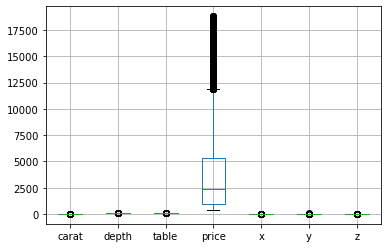

In [47]:
diamonds.boxplot()

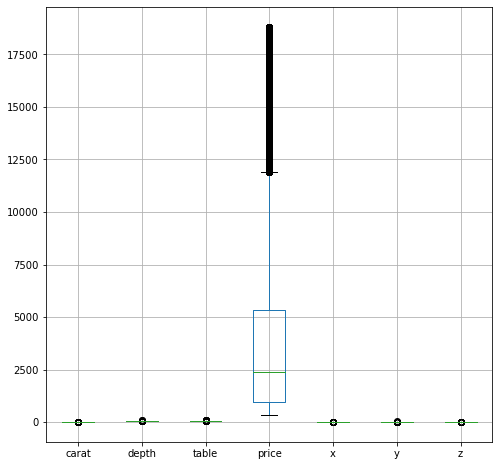

In [48]:
diamonds.boxplot(figsize=(8,8))

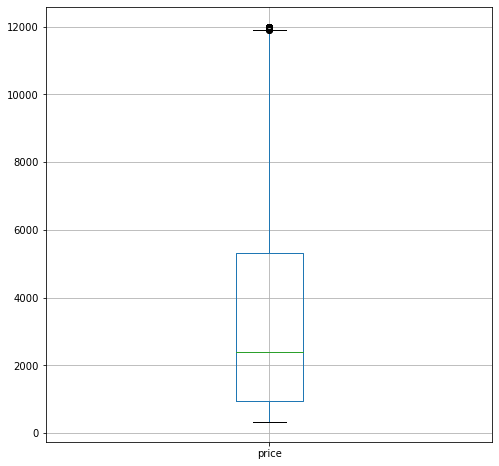

In [49]:
diamonds['price'].clip(0,12000).plot(kind='box', figsize=(8, 8), grid=True)

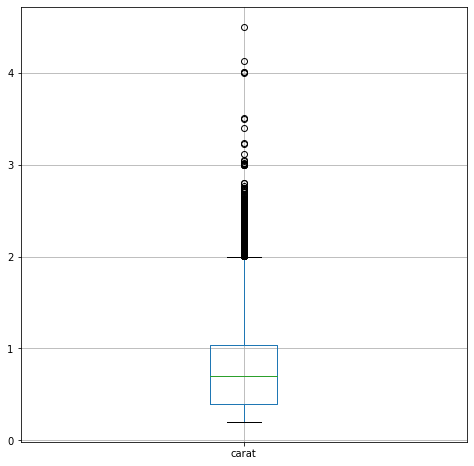

In [50]:
diamonds['carat'].clip(0,5).plot(kind='box', figsize=(8, 8), grid=True)

#### Histogram chart

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dd51750d0>,
      dtype=object)

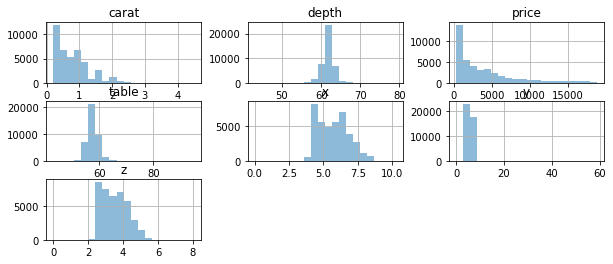

In [51]:
diamonds.hist(figsize=(10,4), bins=20, alpha=0.5)

#### Correlaciones en gráficos

In [52]:
diamonds.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.97
depth,0.03,1.00,-0.29,-0.01,-0.03,-0.03,0.09
table,0.18,-0.29,1.00,0.13,0.20,0.18,0.16
price,0.92,-0.01,0.13,1.00,0.89,0.87,0.87
x,0.98,-0.03,0.20,0.89,1.00,0.97,0.98
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.96
z,0.97,0.09,0.16,0.87,0.98,0.96,1.00


### Pandas Matplotlib plots

In [53]:
import matplotlib.pyplot as plt

#### Scatter Plot

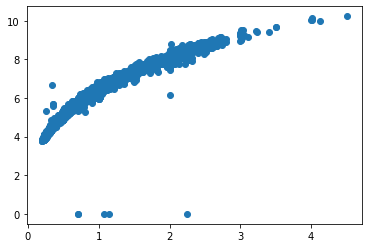

In [54]:
plt.scatter(diamonds['carat'], diamonds['x'])

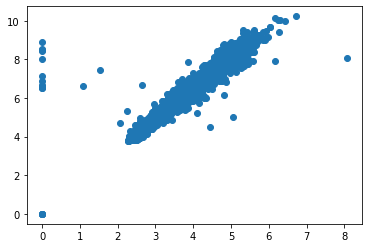

In [55]:
plt.scatter(diamonds['z'], diamonds['x'])

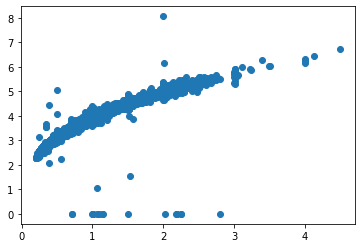

In [56]:
plt.scatter(diamonds['carat'], diamonds['z'])

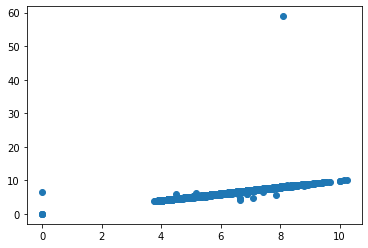

In [57]:
plt.scatter(diamonds['x'], diamonds['y'])

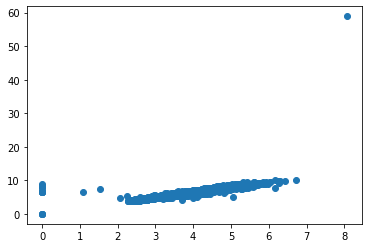

In [58]:
plt.scatter(diamonds['z'], diamonds['y'])

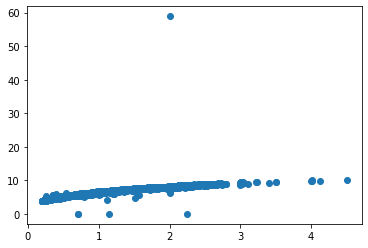

In [59]:
plt.scatter(diamonds['carat'], diamonds['y'])

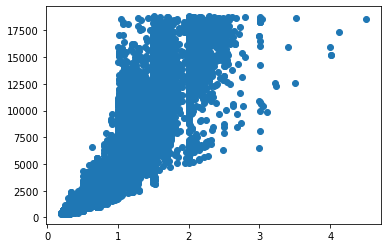

In [60]:
plt.scatter(diamonds['carat'], diamonds['price'])

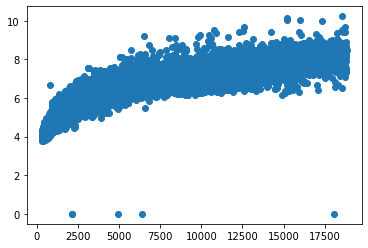

In [61]:
plt.scatter(diamonds['price'], diamonds['x'])

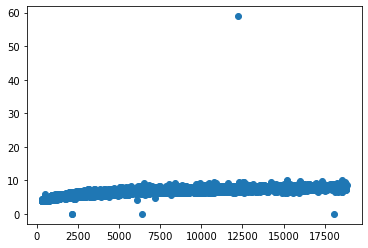

In [62]:
plt.scatter(diamonds['price'], diamonds['y'])

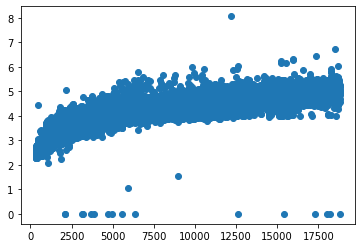

In [63]:
plt.scatter(diamonds['price'], diamonds['z'])

In [64]:
diamonds.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.97
depth,0.03,1.00,-0.29,-0.01,-0.03,-0.03,0.09
table,0.18,-0.29,1.00,0.13,0.20,0.18,0.16
price,0.92,-0.01,0.13,1.00,0.89,0.87,0.87
x,0.98,-0.03,0.20,0.89,1.00,0.97,0.98
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.96
z,0.97,0.09,0.16,0.87,0.98,0.96,1.00


In [65]:
diamonds.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(2)

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.20,0.96,1.00,1.00,0.99
depth,0.03,1.00,-0.24,0.01,-0.03,-0.03,0.10
table,0.20,-0.24,1.00,0.18,0.20,0.20,0.16
price,0.96,0.01,0.18,1.00,0.96,0.96,0.96
x,1.00,-0.03,0.20,0.96,1.00,1.00,0.99
y,1.00,-0.03,0.20,0.96,1.00,1.00,0.99
z,0.99,0.10,0.16,0.96,0.99,0.99,1.00


### Seaborn plots

In [66]:
import seaborn as sns
import warnings

#### Histogram plot

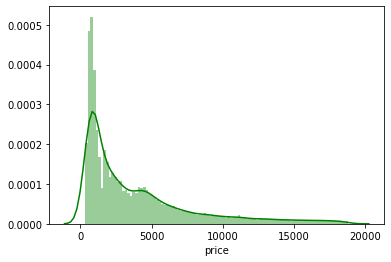

In [71]:
sns.distplot(diamonds['price'], bins=100, color='green')

whit this histogram plot of the price variable, I can see a deviation from the normal distribution, some peaks and a positive asymmetry

Skewness meaning: Is the degree to which the data is not symmetric. The fact that the skew value is 0, positive or negative, reveals information about the shape of the data. In this case is positive because the skew value is greater than 0 and I suppose that the majority of diamonds of dataset are cheaper than exclusive diamonds that are more expensive

In [72]:
print("Skewness: %f" % diamonds['price'].skew())

Skewness: 1.618838


Kurtosis indicates how the tails of a distribution differ from the normal distribution. In this case, the kurtosis is positive and indicates that the distribution has heavier tails than the normal distribution.

In [73]:
print("Kurtosis: %f" % diamonds['price'].kurt())

Kurtosis: 2.175589


#### Relation with numeric variables

#### scatter plot

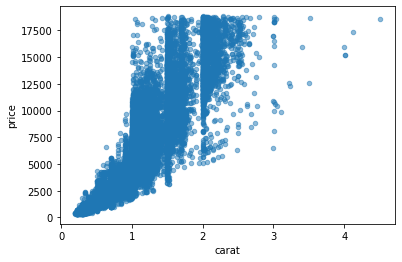

In [74]:
var = 'carat'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

The carat weight variable maintain a positive linear relationship with price, increasing in the same direction. Higher price are related with carat weight greater than two

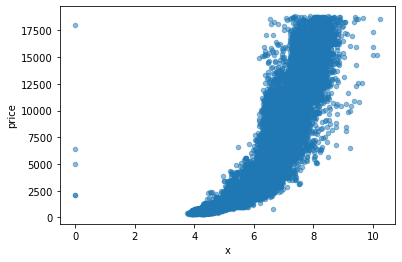

In [75]:
var = 'x'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

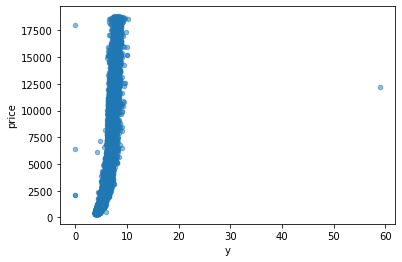

In [76]:
var = 'y'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

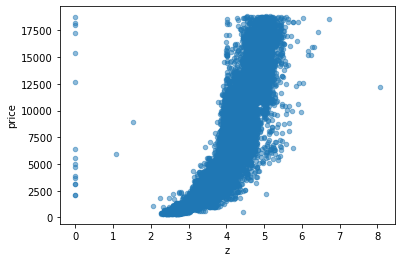

In [77]:
var = 'z'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

The slope of price between the variables 'x, y, z' is very steep

#### Relation with categoric variables

#### Box plot

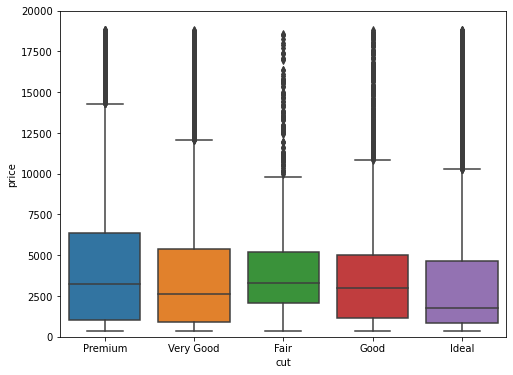

In [78]:
var = 'cut'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=20000);

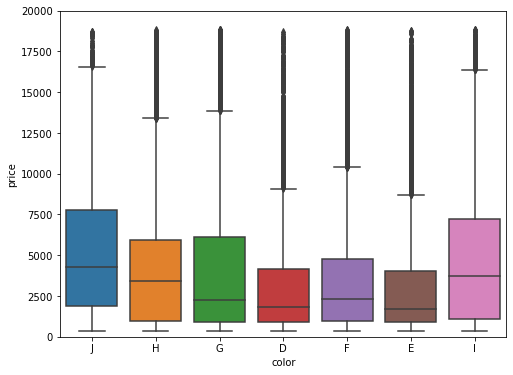

In [79]:
var = 'color'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=20000);

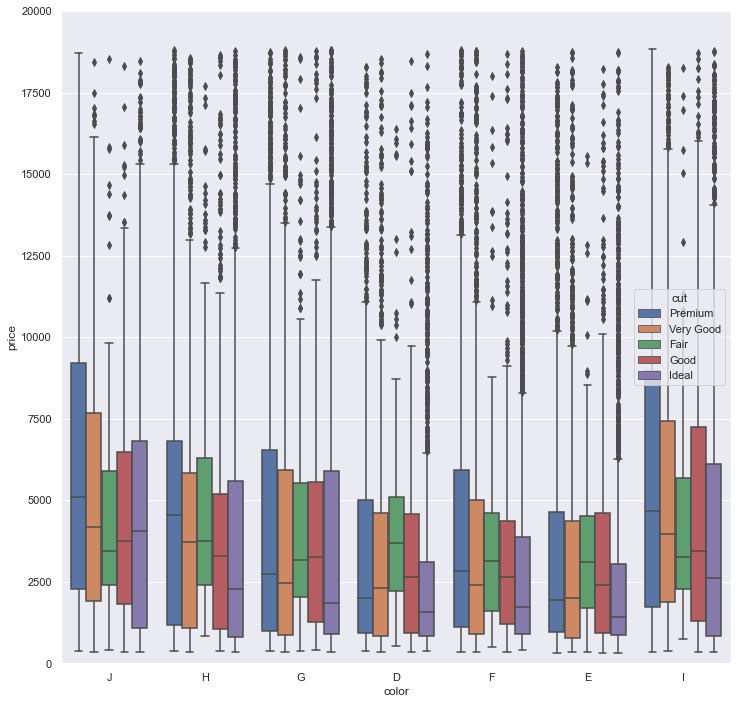

In [95]:
var = 'color'
f, ax = plt.subplots(figsize=(12, 12))
fig = sns.boxplot(x=var, y="price", data=diamonds, hue='cut')
fig.axis(ymin=0, ymax=20000);

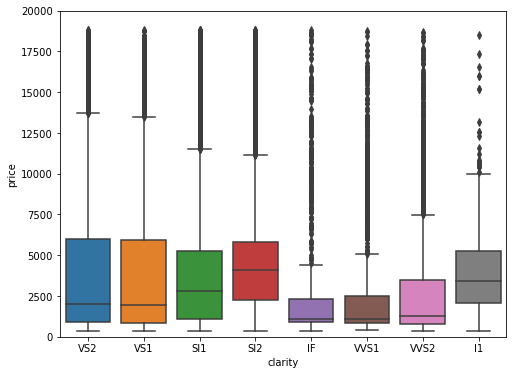

In [80]:
var = 'clarity'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=20000);

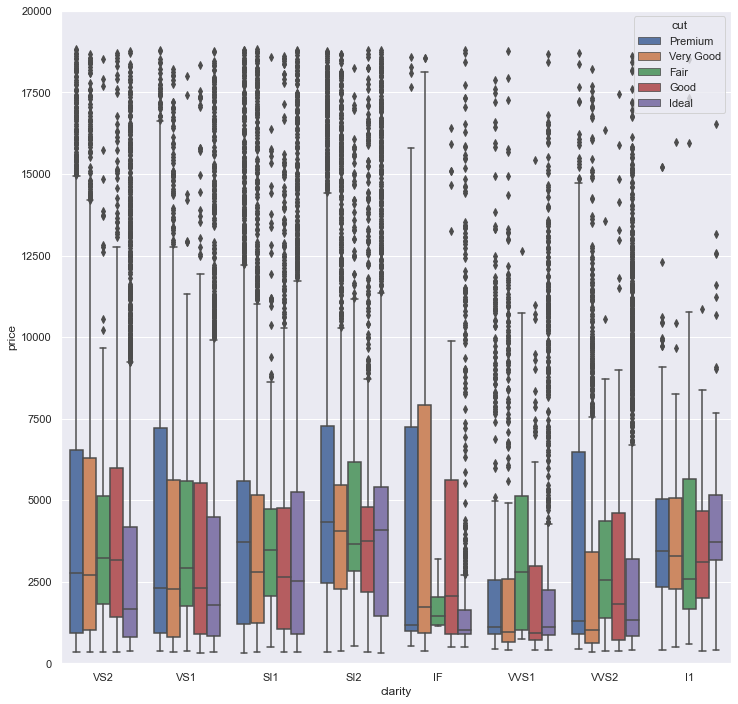

In [98]:
var = 'clarity'
f, ax = plt.subplots(figsize=(12, 12))
fig = sns.boxplot(x=var, y="price", data=diamonds, hue='cut')
fig.axis(ymin=0, ymax=20000);

Categorical variables as cut, color & clarity seem to be related to the price variable

#### Violin plot

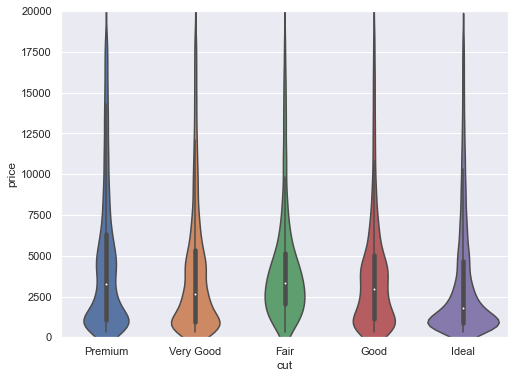

In [99]:
var = 'cut'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.violinplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=20000);

#### LM Plot

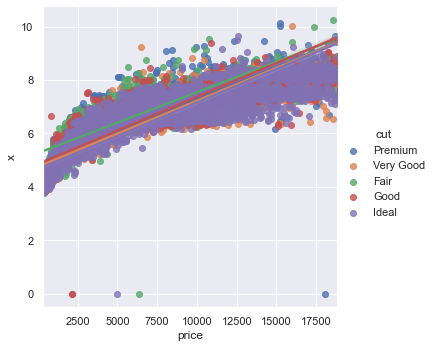

In [102]:
sns.lmplot(x='price', y='x', data=diamonds, hue='cut')

#### Correlation variables

to complete a more general analysis and to know the correlations between variables but paying special attention to the price variable

#### Heatmap plot

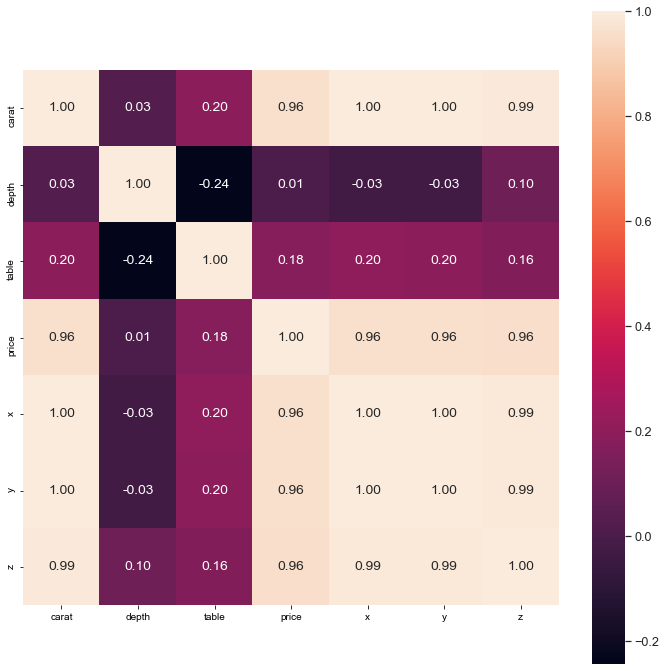

In [81]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)

sns.set(font_scale = 1.15)
sns.heatmap(diamonds.corr(method='spearman'), 
            cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2f', 
            ax=ax);


In [82]:
corr = diamonds.corr()
corr[['price']].sort_values(by = 'price',ascending = False).style.background_gradient()

,price
price,1.000000
carat,0.921935
x,0.885848
z,0.874500
y,0.866163
table,0.130111
depth,-0.014864


As I can see, carat variable is strongly correlated, followed closely by other variables as x, z and y. There is no price correlation with table variable and depth variable.

#### Joint plot

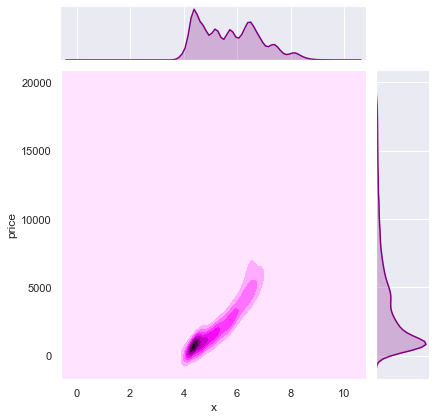

In [88]:
sns.jointplot(x='x', y='price', data=diamonds, kind='kde', color='purple')

#### Scatter plot

/home/christian/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


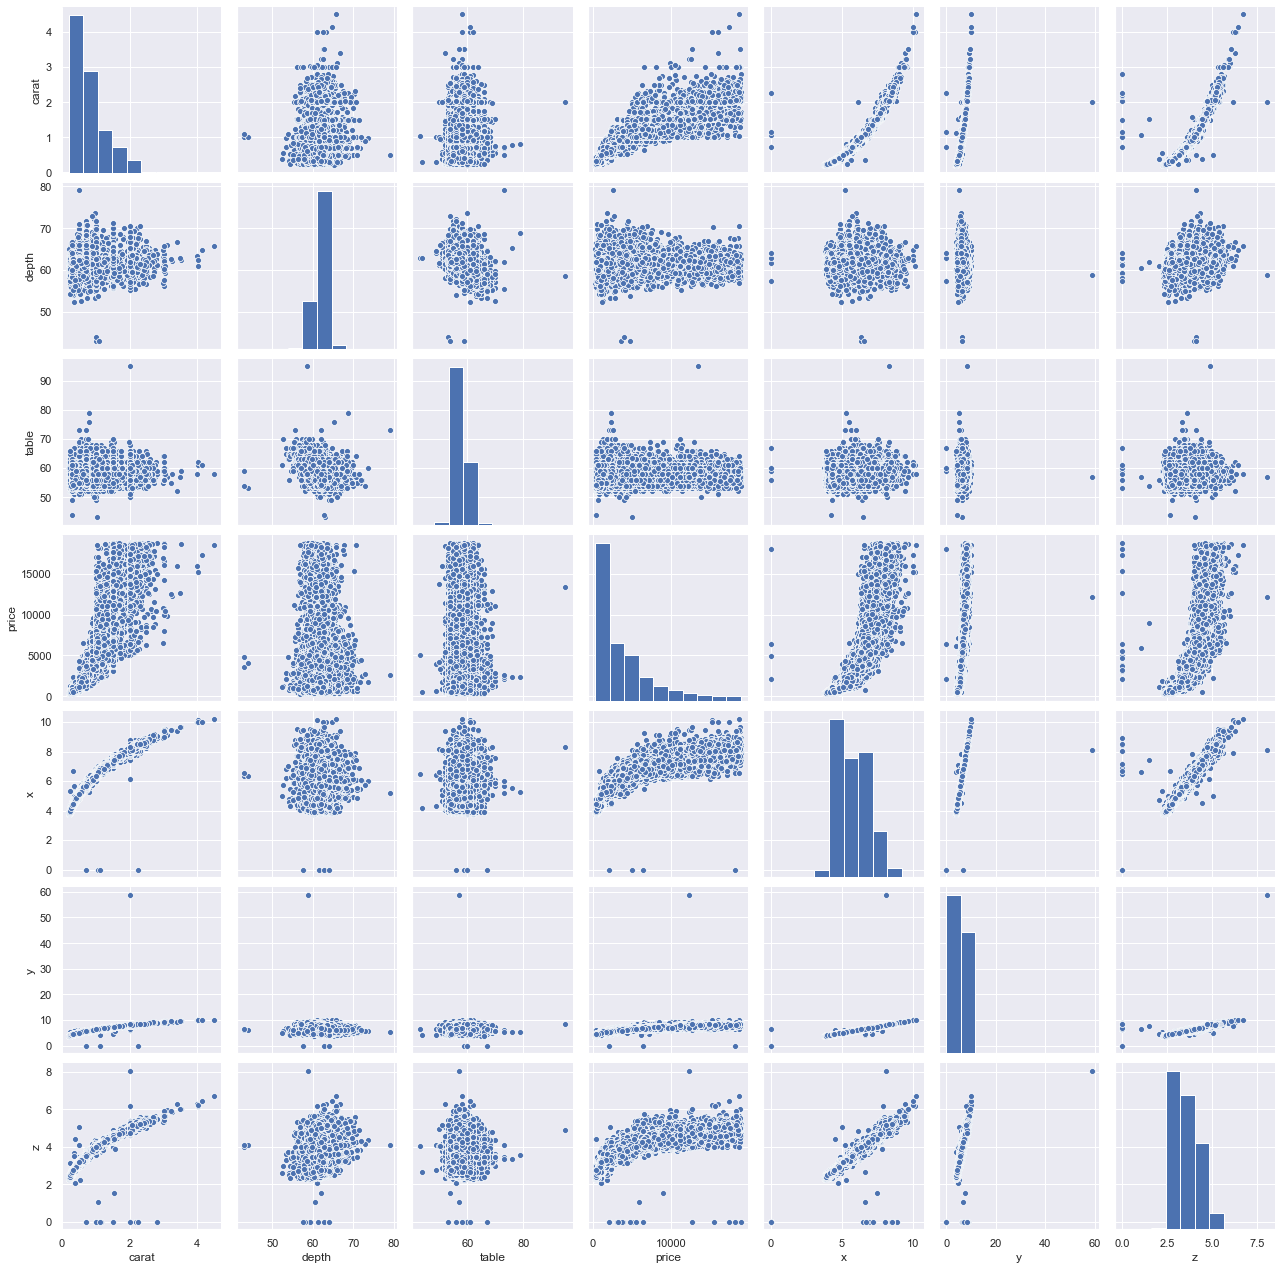

In [83]:
sns.set()
cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
sns.pairplot(diamonds[cols], size = 2.5)
plt.show();

/home/christian/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


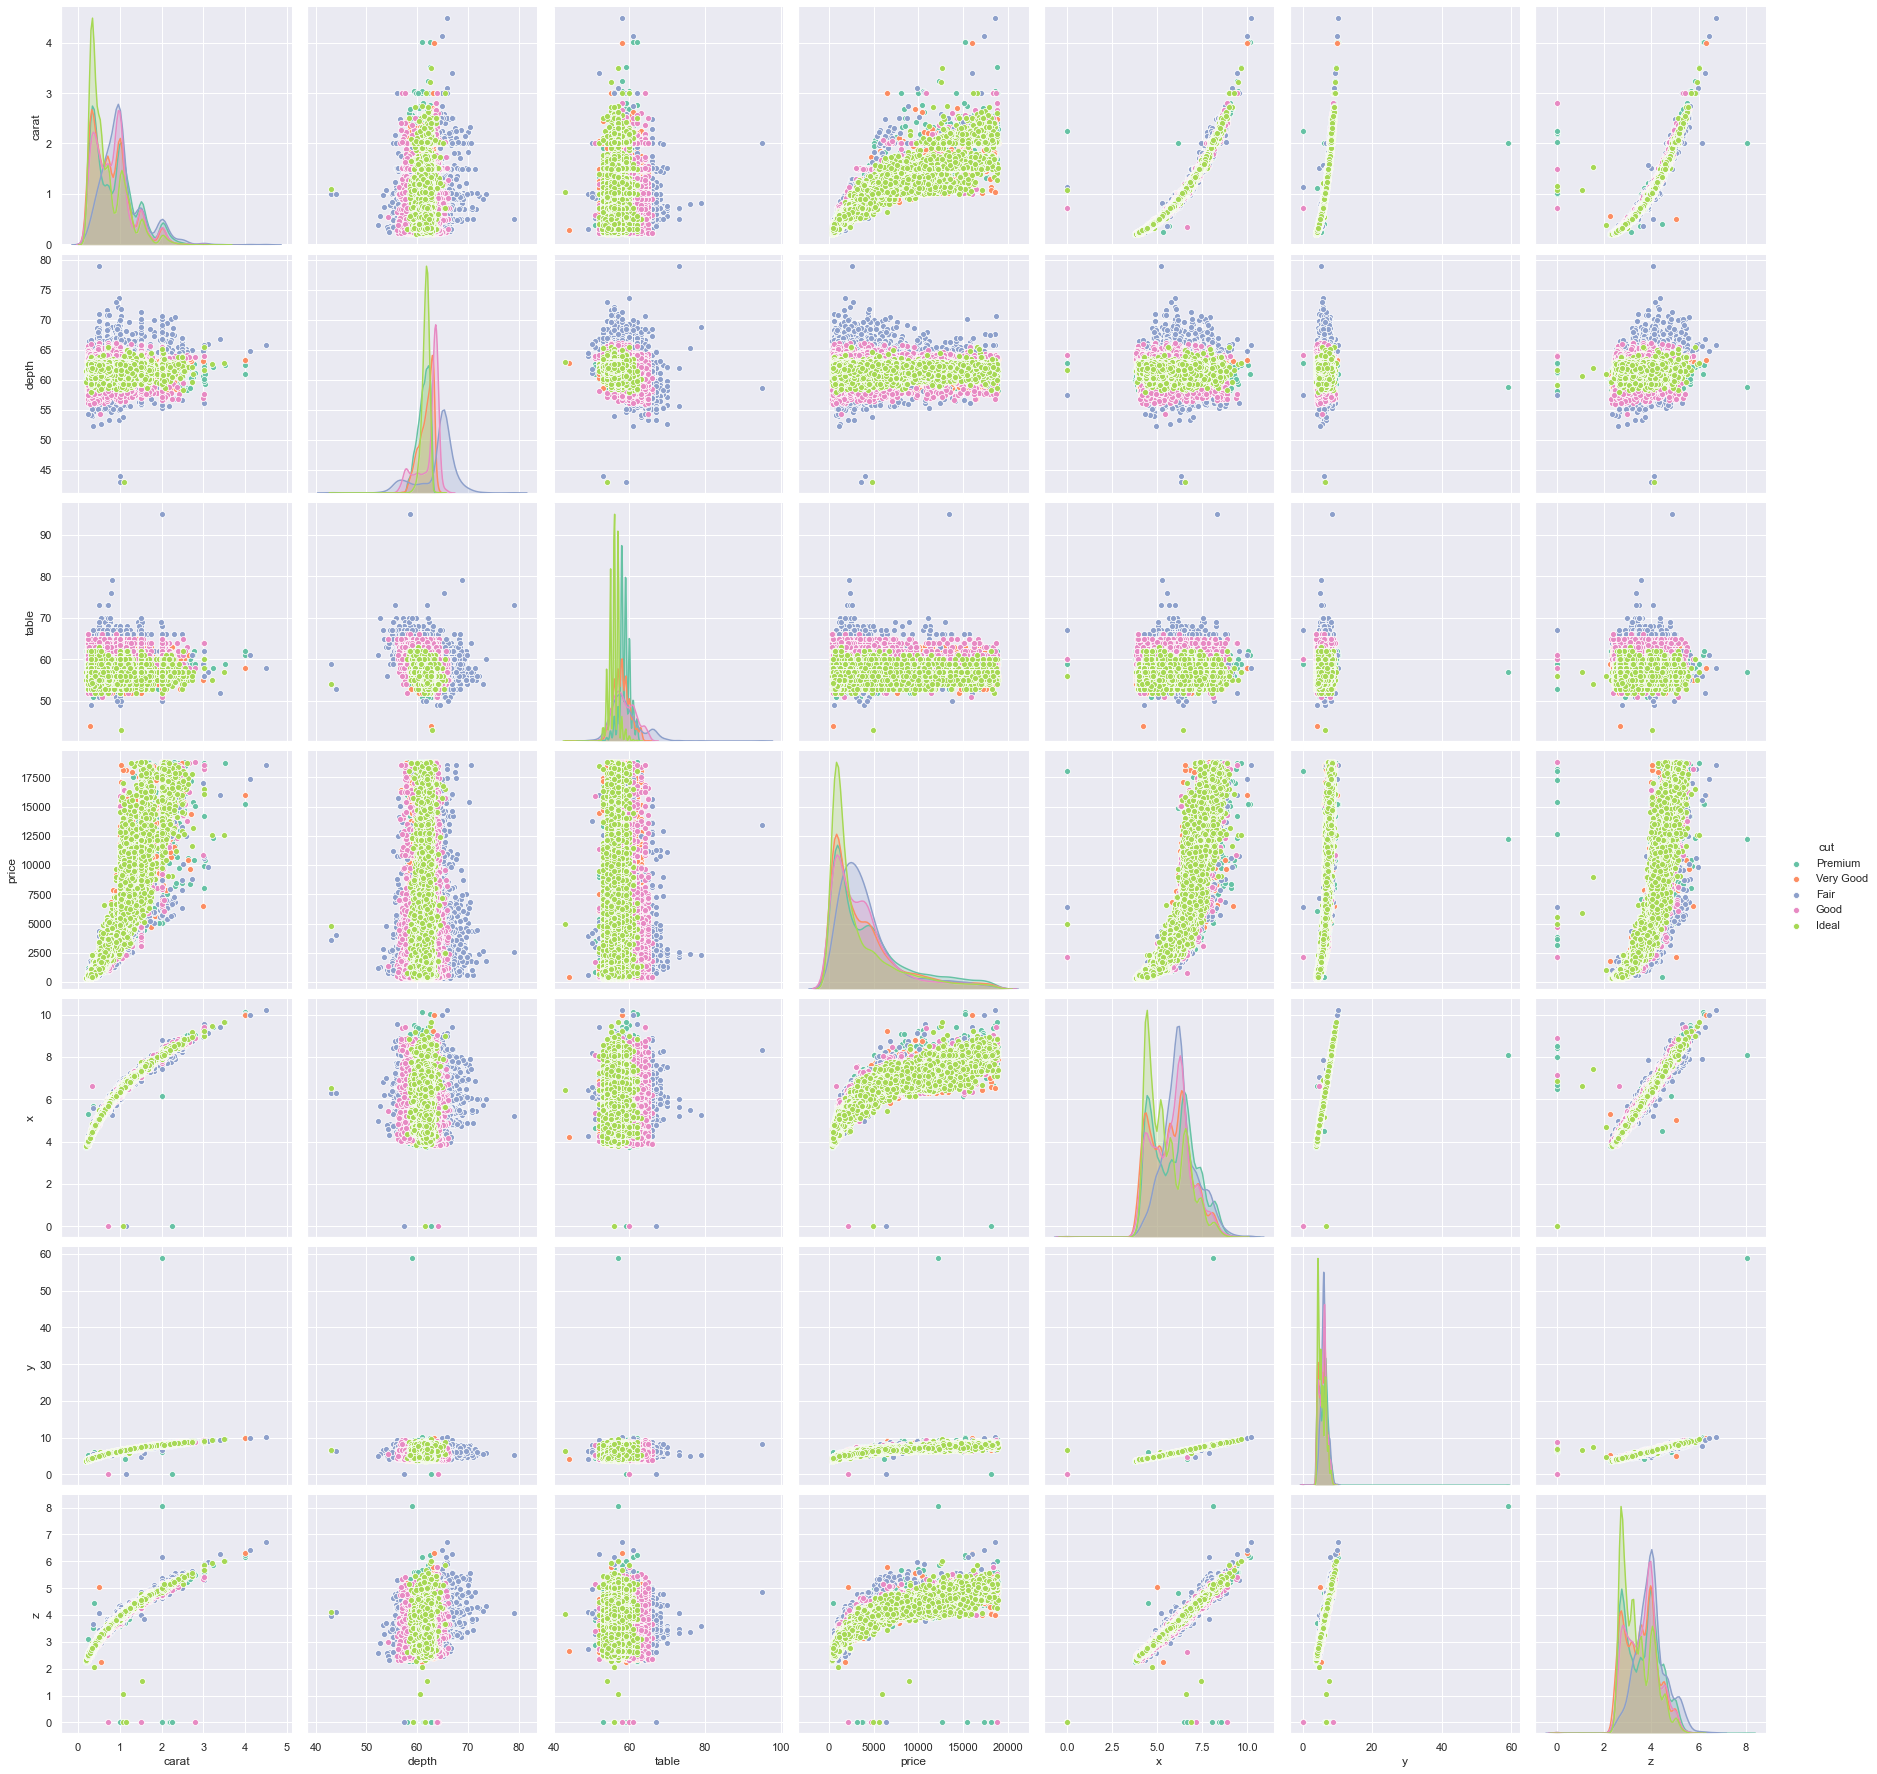

In [104]:
sns.pairplot(diamonds, hue='cut', palette='Set2', size=3.5)

#### Outliers

In [109]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [111]:
price_scaled = StandardScaler().fit_transform(diamonds['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range = price_scaled[price_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-0.90233304]
 [-0.90233304]
 [-0.90208256]
 [-0.90032921]
 [-0.90007874]
 [-0.89957778]
 [-0.89957778]
 [-0.8993273 ]
 [-0.89907683]
 [-0.89882635]]

Fuera de la distribución (por arriba):
[[3.72174108]
 [3.72199156]
 [3.72274299]
 [3.72274299]
 [3.7237449 ]
 [3.7237449 ]
 [3.72424586]
 [3.72650016]
 [3.7295059 ]
 [3.73075829]]


#### Normality check

Normality means is that the data should look like a normal distribution. It is important because various statistical tests are based on this assumption. I'm just going to check the normality of the variable 'price'. Furthermore, if we solve normality we avoid other problems, such as homoscedasticity.

In [117]:
from scipy import stats
from scipy.stats import norm

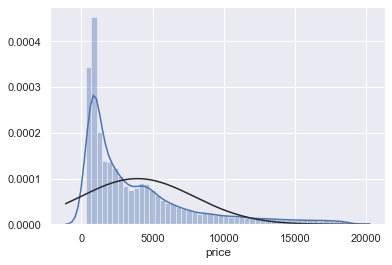

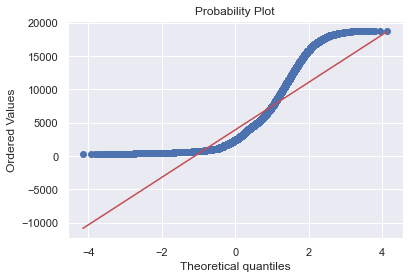

In [118]:
sns.distplot(diamonds['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(diamonds['price'], plot = plt)

From those plots it appears that 'price' does not make up a normal distribution. It shows positive skewness and does not follow the diagonal line, although a simple data transformation can solve the problem

In [120]:
# Transformación de los datos:
#diamonds['standardprice'] = np.log(diamonds['price'])

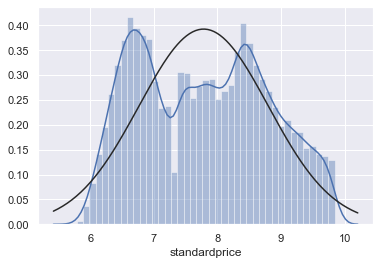

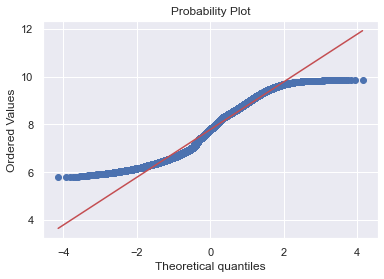

In [121]:
#sns.distplot(diamonds['standardprice'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(diamonds['standardprice'], plot = plt)

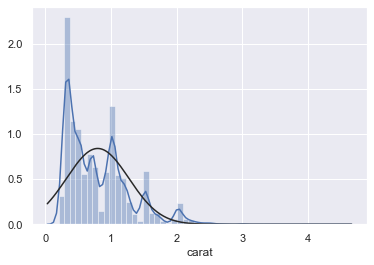

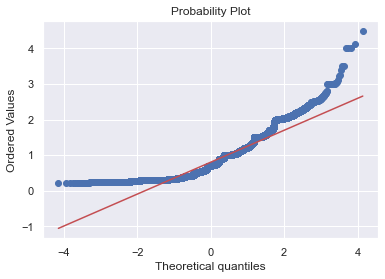

In [119]:
sns.distplot(diamonds['carat'], fit=norm);
fig = plt.figure()
res = stats.probplot(diamonds['carat'], plot = plt)

In [122]:
# Transformación de los datos:
#diamonds['standardcarat'] = np.log(diamonds['carat'])

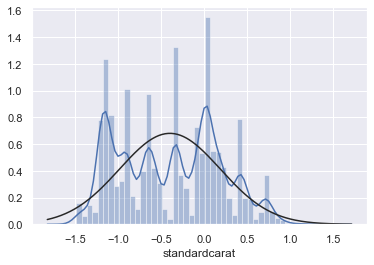

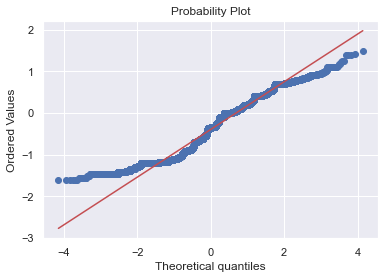

In [123]:
#sns.distplot(diamonds['standardcarat'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(diamonds['standardcarat'], plot = plt)

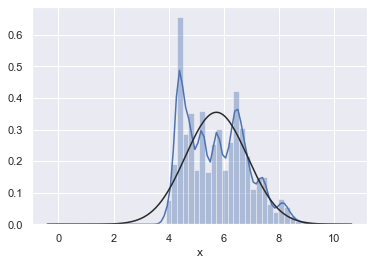

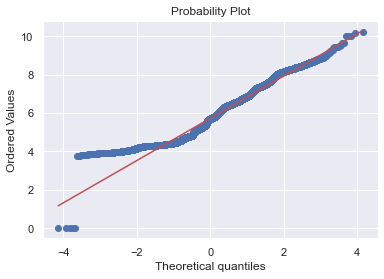

In [124]:
sns.distplot(diamonds['x'], fit = norm);
fig = plt.figure()
res = stats.probplot(diamonds['x'], plot = plt)